# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: SOUMINI MOHANDAS

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [2]:
# Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete

In [3]:
# Load the concrete dataset into a feature matrix X and a target vector y
X, y = load_concrete()

In [4]:
# Print the size and type of the feature matrix X 
# Shape indicates (n_samples, n_features)
print("The shape of feature matrix X: ", X.shape) 
print("The type of feature matrix X: ", type(X))

The shape of feature matrix X:  (1030, 8)
The type of feature matrix X:  <class 'pandas.core.frame.DataFrame'>


In [5]:
# Print the size and type of the target vector y 
# Shape indicates length (n_samples)
print("The shape of target vector y: ", y.shape) 
print("The type of taget vector y: ", type(y))

The shape of target vector y:  (1030,)
The type of taget vector y:  <class 'pandas.core.series.Series'>


In [6]:
# Shows the various columns present in the feature matrix 
# (i.e., 8 features = 8 columns)
X.head()

,cement,slag,ash,water,splast,coarse,fine,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [7]:
# Shows the 1D target array having only 1 column (i.e., strength)
y.head(10)

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
5    47.029847
6    43.698299
7    36.447770
8    45.854291
9    39.289790
Name: strength, dtype: float64

### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

In [8]:
# Check if the X dataframe contains any missing or NaN values
# sum() indicates the total count of NaN values present in each column 
X.isnull().sum()

cement    0
slag      0
ash       0
water     0
splast    0
coarse    0
fine      0
age       0
dtype: int64

In [9]:
# Check if the target vector y has any missing values 
# present in its 1 column (i.e., strength)
y.isnull().sum()

0

In [10]:
# As seen in the above 2 commands, there are no missing or NaN values
# in either the feature matrix X or the target vector y
# Hence it is not necessary to use a method to fill in missing values
# If missing values had existed, we would have used the following commands
# assuming that we are filling it with Zeros instead of just dropping 
# the row or column containing missing or NaN values 
# X.fillna(0) # For feature matrix X
# y.fillna(0) # For target vector y 

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

In [11]:
# Create the required training and testing sets from the given dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

In [12]:
# Consider the 1st Model - Decision Tree Regression Model 
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=5, random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

For the Decision Tree Regression Model as seen above, in addition to the max_depth parameter, the random_state parameter was also specified, and that was set to 0.

In [13]:
# Consider the 2nd Model - Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

For the Random Forest Regression Model as seen above, in addition to the max_depth parameter, the random_state parameter was also specified, and that was set to 0. Also the n_estimators was set to a value of 100, since the higher the number of trees the better to learn the data. 

In [14]:
# Consider the 3rd Model - Gradient Boosting Regression Model
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1, random_state=0)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, random_state=0)

For the Gradient Boosting Regression Model as seen above, in addition to the max_depth parameter, the random_state parameter was also specified, and that was set to 0. Also the learning_rate was set to a value of 0.1, since a lower learning rate can dramatically improve the performance of the model. 

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

In [15]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error as mse
def calculate_average_mse(model, X_train, y_train, cv=5):
    mse_scores = cross_validate(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
    train_mse = -mse_scores['train_score']
    val_mse = -mse_scores['test_score']
    
    # Calculate the mean MSE scores
    avg_train_mse = np.mean(train_mse)
    avg_val_mse = np.mean(val_mse)
    
    return avg_train_mse, avg_val_mse

# Calculate average MSE for Decision Tree
avg_train_mse_dt, avg_val_mse_dt = calculate_average_mse(dt_model, X_train, y_train, cv=5)

# Calculate average MSE for Random Forest
avg_train_mse_rf, avg_val_mse_rf = calculate_average_mse(rf_model, X_train, y_train, cv=5)

# Calculate average MSE for Gradient Boosting Machines
avg_train_mse_gb, avg_val_mse_gb = calculate_average_mse(gb_model, X_train, y_train, cv=5)

print("Decision Tree - Average Training MSE:", avg_train_mse_dt)
print("Decision Tree - Average Validation MSE:", avg_val_mse_dt)
print("\nRandom Forest - Average Training MSE:", avg_train_mse_rf)
print("Random Forest - Average Validation MSE:", avg_val_mse_rf)
print("\nGradient Boosting - Average Training MSE:", avg_train_mse_gb)
print("Gradient Boosting - Average Validation MSE:", avg_val_mse_gb)

Decision Tree - Average Training MSE: 47.82297374707941
Decision Tree - Average Validation MSE: 74.04533535288454

Random Forest - Average Training MSE: 30.29636272513661
Random Forest - Average Validation MSE: 47.6147076815418

Gradient Boosting - Average Training MSE: 3.694308275687585
Gradient Boosting - Average Validation MSE: 23.546500376160946


### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [16]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

In [17]:
# Create an empty DataFrame
results = pd.DataFrame(index=["DT", "RF", "GB"], columns=["Training accuracy (MSE)", "Validation accuracy (MSE)"])

# Define the models
models = [dt_model, rf_model, gb_model]

# Iterate through the models and calculate accuracy
for idx, model in enumerate(models):
    avg_train_mse, avg_val_mse = calculate_average_mse(model, X_train, y_train, cv=5)
    
    # Store the results in the DataFrame
    results.loc[results.index[idx], "Training accuracy (MSE)"] = avg_train_mse
    results.loc[results.index[idx], "Validation accuracy (MSE)"] = avg_val_mse

# Print the results DataFrame
print(results)

   Training accuracy (MSE) Validation accuracy (MSE)
DT               47.822974                 74.045335
RF               30.296363                 47.614708
GB                3.694308                   23.5465


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [18]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score as r2
def calculate_average_r2(model, X_train, y_train, cv=5):
    r2_scores = cross_validate(model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)
    train_r2 = r2_scores['train_score']
    val_r2 = r2_scores['test_score']
    
    # Calculate the mean MSE scores
    avg_train_r2 = np.mean(train_r2)
    avg_val_r2 = np.mean(val_r2)
    
    return avg_train_r2, avg_val_r2

# Calculate average MSE for Decision Tree
avg_train_r2_dt, avg_val_r2_dt = calculate_average_r2(dt_model, X_train, y_train, cv=5)

# Calculate average MSE for Random Forest
avg_train_r2_rf, avg_val_r2_rf = calculate_average_r2(rf_model, X_train, y_train, cv=5)

# Calculate average MSE for Gradient Boosting Machines
avg_train_r2_gb, avg_val_r2_gb = calculate_average_r2(gb_model, X_train, y_train, cv=5)

print("Decision Tree - Average Training R2-score:", avg_train_r2_dt)
print("Decision Tree - Average Validation R2-score:", avg_val_r2_dt)
print("\nRandom Forest - Average Training R2-score:", avg_train_r2_rf)
print("Random Forest - Average Validation R2-score:", avg_val_r2_rf)
print("\nGradient Boosting - Average Training R2-score:", avg_train_r2_gb)
print("Gradient Boosting - Average Validation R2-score:", avg_val_r2_gb)

Decision Tree - Average Training R2-score: 0.8304365153519161
Decision Tree - Average Validation R2-score: 0.7351844581475954

Random Forest - Average Training R2-score: 0.8926341961695009
Random Forest - Average Validation R2-score: 0.830004245718197

Gradient Boosting - Average Training R2-score: 0.9869031337469079
Gradient Boosting - Average Validation R2-score: 0.9161546953448305


In [19]:
# Create an empty DataFrame
results = pd.DataFrame(index=["DT", "RF", "GB"], columns=["Training accuracy (R2)", "Validation accuracy (R2)"])

# Define the models
models = [dt_model, rf_model, gb_model]

# Iterate through the models and calculate accuracy
for idx, model in enumerate(models):
    avg_train_r2, avg_val_r2 = calculate_average_r2(model, X_train, y_train, cv=5)
    
    # Store the results in the DataFrame
    results.loc[results.index[idx], "Training accuracy (R2)"] = avg_train_r2
    results.loc[results.index[idx], "Validation accuracy (R2)"] = avg_val_r2

# Print the results DataFrame
print(results)

   Training accuracy (R2) Validation accuracy (R2)
DT               0.830437                 0.735184
RF               0.892634                 0.830004
GB               0.986903                 0.916155


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [20]:
# Import wine dataset
# Define column headers based on the dataset description
column_headers = [
    'class', 'Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
    'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
    'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280/OD315_of_diluted_wines',
    'Proline']
# Download the dataset from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
# Load the dataset into a pandas DataFrame with column headers
wine_df = pd.read_csv(url, names=column_headers)
# Display the wine dataset showing all the stated columns
wine_df

,class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [21]:
# Split the dataset into X (feature matrix) and y (target vector)
X = wine_df.drop('class', axis=1)  # Drop the 'class' column to get the feature matrix (without target vector)
y = wine_df['class']  # 'class' column represents the target vector

In [22]:
# Print the size and type of the feature matrix X 
# Shape indicates (n_samples, n_features)
print("The shape of feature matrix X: ", X.shape) 
print("The type of feature matrix X: ", type(X))

The shape of feature matrix X:  (178, 13)
The type of feature matrix X:  <class 'pandas.core.frame.DataFrame'>


In [23]:
# Print the size and type of the target vector y 
# Shape indicates length (n_samples)
print("The shape of target vector y: ", y.shape) 
print("The type of taget vector y: ", type(y))

The shape of target vector y:  (178,)
The type of taget vector y:  <class 'pandas.core.series.Series'>


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [24]:
# Shows the various columns present in the feature matrix 
# Displays the first 5 rows of data
# (i.e., 13 features = 13 columns)
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [25]:
# Shows the 1D target array having only 1 column (i.e., class)
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [26]:
# Check if the X dataframe contains any missing or NaN values
# sum() indicates the total count of NaN values present in each column 
X.isnull().sum()

Alcohol                         0
Malic_Acid                      0
Ash                             0
Ash_Alcanity                    0
Magnesium                       0
Total_Phenols                   0
Flavanoids                      0
Nonflavanoid_Phenols            0
Proanthocyanins                 0
Color_Intensity                 0
Hue                             0
OD280/OD315_of_diluted_wines    0
Proline                         0
dtype: int64

In [27]:
# Check if the target vector y has any missing values 
# present in its 1 column (i.e., class)
y.isnull().sum()

0

In [28]:
# As seen in the above 2 commands, there are no missing or NaN values
# in either the feature matrix X or the target vector y
# Hence it is not necessary to use a method to fill in missing values
# If missing values had existed, we would have used the following commands
# assuming that we are filling it with Zeros instead of just dropping 
# the row or column containing missing or NaN values 
# X.fillna(0) # For feature matrix X
# y.fillna(0) # For target vector y 

How many samples do we have of each type of wine?

In [29]:
# Count the number of samples for each type of wine 
wine_counts = wine_df['class'].value_counts()
print(wine_counts)

class
2    71
1    59
3    48
Name: count, dtype: int64


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

In [30]:
# Import Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier
# Import SVC Model
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
# Define the models
svc_model = SVC()
svc_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train)

# Perform cross-validation for SVC
svc_scores = cross_validate(svc_model, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)

# Perform cross-validation for Decision Tree Classifier
dt_scores = cross_validate(dt_model, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)

# Calculate average training and validation accuracy for each model
svc_train_accuracy = svc_scores['train_score'].mean()
svc_validation_accuracy = svc_scores['test_score'].mean()

dt_train_accuracy = dt_scores['train_score'].mean()
dt_validation_accuracy = dt_scores['test_score'].mean()

# Print the results
print("Average Training Accuracy for SVC:", svc_train_accuracy)
print("Average Validation Accuracy for SVC:", svc_validation_accuracy)

print("Average Training Accuracy for Decision Tree Classifier:", dt_train_accuracy)
print("Average Validation Accuracy for Decision Tree Classifier:", dt_validation_accuracy)

Average Training Accuracy for SVC: 0.6988821611551
Average Validation Accuracy for SVC: 0.6628078817733991
Average Training Accuracy for Decision Tree Classifier: 0.9929669306008384
Average Validation Accuracy for Decision Tree Classifier: 0.9507389162561577


### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [31]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

In [32]:
from sklearn.model_selection import cross_validate

# Define the models
svc_model = SVC()
dt_model = DecisionTreeClassifier(max_depth=3)

# Initialize a list to store the results
results_data = []

# Perform cross-validation for SVC
svc_scores = cross_validate(svc_model, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)

# Calculate average training and validation accuracy for SVC
svc_train_accuracy = svc_scores['train_score'].mean()
svc_validation_accuracy = svc_scores['test_score'].mean()

# Store results for SVC
results_data.append(('SVC', X.shape[0], svc_train_accuracy, svc_validation_accuracy))

# Perform cross-validation for Decision Tree Classifier
dt_scores = cross_validate(dt_model, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)

# Calculate average training and validation accuracy for Decision Tree Classifier
dt_train_accuracy = dt_scores['train_score'].mean()
dt_validation_accuracy = dt_scores['test_score'].mean()

# Store results for Decision Tree Classifier
results_data.append(('Decision Tree', X.shape[0], dt_train_accuracy, dt_validation_accuracy))

# Create the results DataFrame
results = pd.DataFrame(results_data, columns=['Model', 'Data Size', 'Training Accuracy', 'Validation Accuracy'])

# Print results
print(results)

           Model  Data Size  Training Accuracy  Validation Accuracy
0            SVC        178           0.698882             0.662808
1  Decision Tree        178           0.992967             0.950739


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

Answer: 
The Decision Tree Classifier model gave the highest accuracy among the two models. 

In [35]:
# Implement best model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Text(170.97222222222223, 0.5, 'true value')

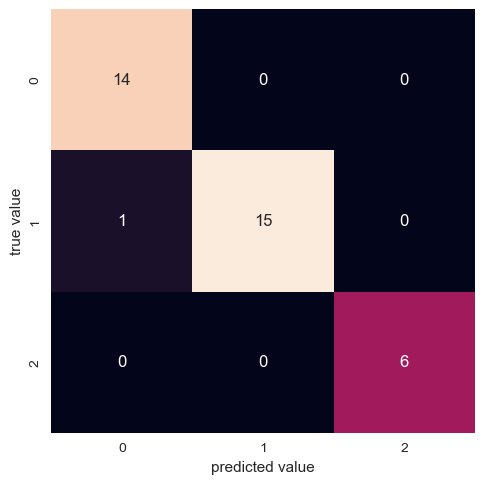

In [36]:
# Print confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_val, dt_model.predict(X_val))

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [37]:
# Print classification report
from sklearn.metrics import classification_report

target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_val, dt_model.predict(X_val), target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.93      1.00      0.97        14
     class 2       1.00      0.94      0.97        16
     class 3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

Answer:
I followed the steps as instructed in this notebook. 

The following resources were referred to for completing this question - lecture notes, Jupyter notebooks on machine learning, model selection, regression models, decision trees, svc models, Python Data Science handbook. 

I had trouble loading the dataset, since I kept getting ValueError and issue with n_splits later on in the code. I later realized that the issue was with how the specific columns were imported. I was able to fix it after multiple tries, and it worked out fine. 

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

I predicted SVM to perform better than the tree model since it can create decision boundaries with fewer features, like the 13 features used in this dataset. However the tree model seems to work better than the SVM model.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [44]:
# Import wine dataset
# Define column headers based on the dataset description
column_headers = [
    'class', 'Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
    'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
    'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280/OD315_of_diluted_wines',
    'Proline']
# Download the dataset from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
# Load the dataset into a pandas DataFrame with column headers
wine_df = pd.read_csv(url, names=column_headers)
# Display the wine dataset showing all the stated columns
wine_df

,class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [45]:
# Split the dataset into X (feature matrix) and y (target vector)
X = wine_df.drop('class', axis=1)  # Drop the 'class' column to get the feature matrix (without target vector)
y = wine_df['class']  # 'class' column represents the target vector

In [46]:
# Import the Linear SVC model from Scikit-Learn
from sklearn.svm import LinearSVC

# Create a training and testing split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Instantiate the model
svc = LinearSVC(max_iter=5000)

# Fit the model
svc.fit(X_train, y_train)

# Perform cross-validation for SVC
svc_scores = cross_validate(svc, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)

# Calculate average training and validation accuracy for the model
svc_training_accuracy = svc_scores['train_score'].mean()
svc_validation_accuracy = svc_scores['test_score'].mean()

# Print the results
print("Average Training Accuracy for SVC:", svc_training_accuracy)
print("Average Validation Accuracy for SVC:", svc_validation_accuracy)

C:\Users\soumi\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\soumi\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\soumi\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\soumi\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\soumi\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will ch

Average Training Accuracy for SVC: 0.8962583449774879
Average Validation Accuracy for SVC: 0.8869458128078819


C:\Users\soumi\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


*ANSWER HERE*